<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 165.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 168.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 159.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 143.6 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
df.loc[df['Employment'].isna(), ['JobSat', 'RemoteWork']] = pd.NA
df = df.dropna(subset=['Employment'])

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_300/3526469556.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, right=True)
/tmp/ipykernel_300/3526469556.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df_clean.groupby('ExperienceRange')['JobSat'].median().reset_index()


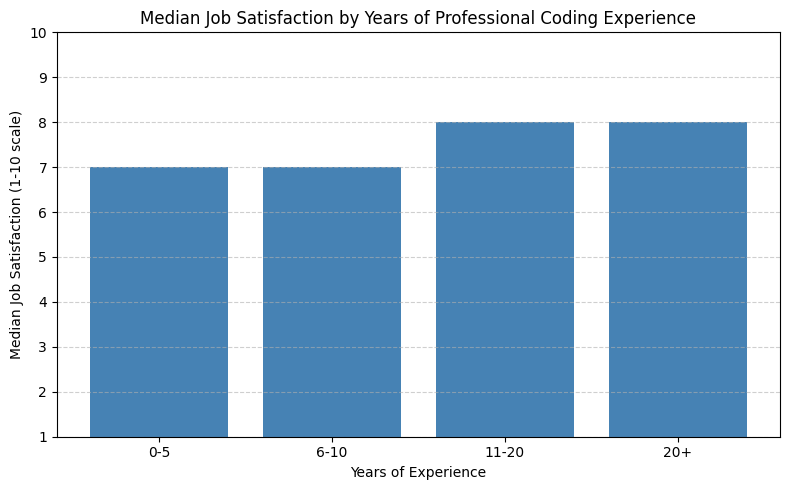

In [4]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

df_clean = df.dropna(subset=['YearsCodePro', 'JobSat'])

bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '6-10', '11-20', '20+']
df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, right=True)

median_satisfaction = df_clean.groupby('ExperienceRange')['JobSat'].median().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(median_satisfaction['ExperienceRange'], median_satisfaction['JobSat'], color='steelblue')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Median Job Satisfaction (1-10 scale)')
plt.ylim(1, 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


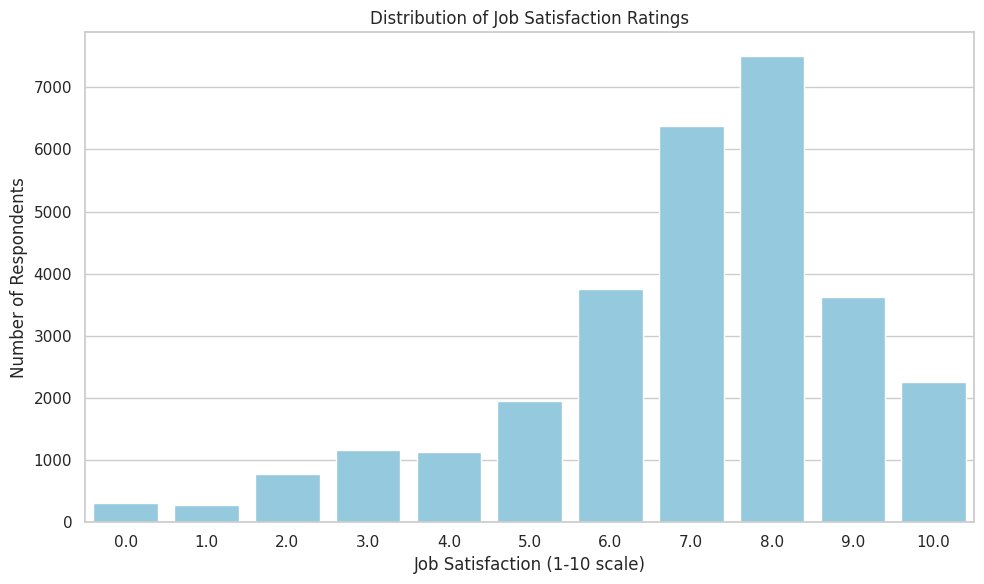

In [6]:
## Write your code here
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

df_clean = df.dropna(subset=['JobSat'])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df_clean, color='skyblue')
plt.title('Distribution of Job Satisfaction Ratings')
plt.xlabel('Job Satisfaction (1-10 scale)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


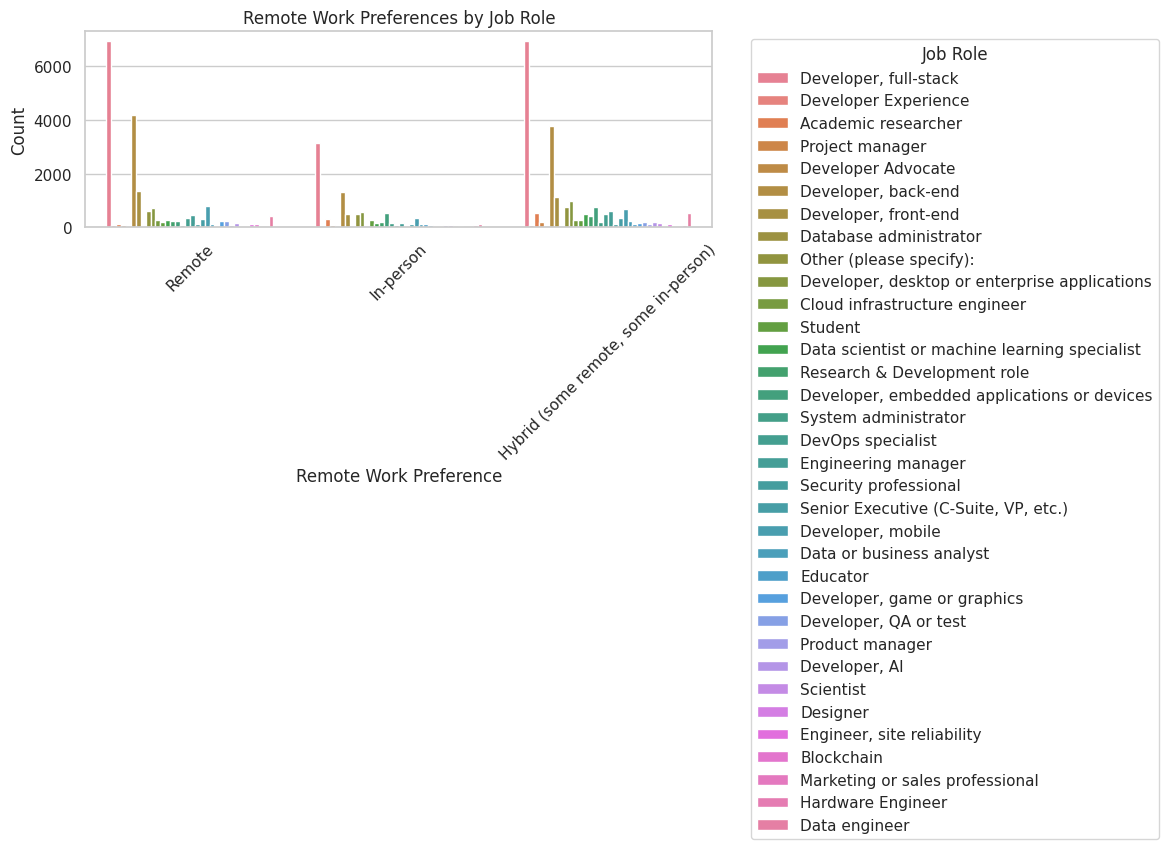

Employment                                     Employed, full-time            \
RemoteWork                    Hybrid (some remote, some in-person) In-person   
DevType                                                                        
Academic researcher                                            324       209   
Blockchain                                                      16        14   
Cloud infrastructure engineer                                  220        42   
Data engineer                                                  430       110   
Data or business analyst                                       177        96   

Employment                           Employed, full-time;Employed, part-time  \
RemoteWork                    Remote    Hybrid (some remote, some in-person)   
DevType                                                                        
Academic researcher               43                                       1   
Blockchain                        66                                       0   
Cloud infrastructure engineer    216                                       1   
Data engineer                    297                                       1   
Data or business analyst          77                                       0   

Employment                                      \
RemoteWork                    In-person Remote   
DevType                                          
Academic researcher                   1      0   
Blockchain                            0      3   
Cloud infrastructure engineer         0      0   
Data engineer                         0      1   
Data or business analyst              0      1   

Employment                    Employed, full-time;Independent contractor, freelancer, or self-employed  \
RemoteWork                                                        Hybrid (some remote, some in-person)   
DevType                                                                                                  
Academic researcher                                                           16                         
Blockchain                                                                     2                         
Cloud infrastructure engineer                                                 19                         
Data engineer                                                                 20                         
Data or business analyst                                                      12                         

Employment                                      \
RemoteWork                    In-person Remote   
DevType                                          
Academic researcher                   7      6   
Blockchain                            1     24   
Cloud infrastructure engineer         4     29   
Data engineer                         8     37   
Data or business analyst              3      4   

Employment                    Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time  \
RemoteWork                                                                            Hybrid (some remote, some in-person)   
DevType                                                                                                                      
Academic researcher                                                            1                                             
Blockchain                                                                     0                                             
Cloud infrastructure engineer                                                  1                                             
Data engineer                                                                  0                                             
Data or business analyst                                                       0                                             

Employment                                      \
RemoteWo

In [7]:
## Write your code here
df_remote = df.dropna(subset=['RemoteWork', 'Employment', 'DevType'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df_remote, x='RemoteWork', hue='DevType')
plt.title('Remote Work Preferences by Job Role')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

remote_crosstab = pd.crosstab(index=df_remote['DevType'],
                              columns=[df_remote['Employment'], df_remote['RemoteWork']])

remote_crosstab.head()
                

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_300/4045377431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')


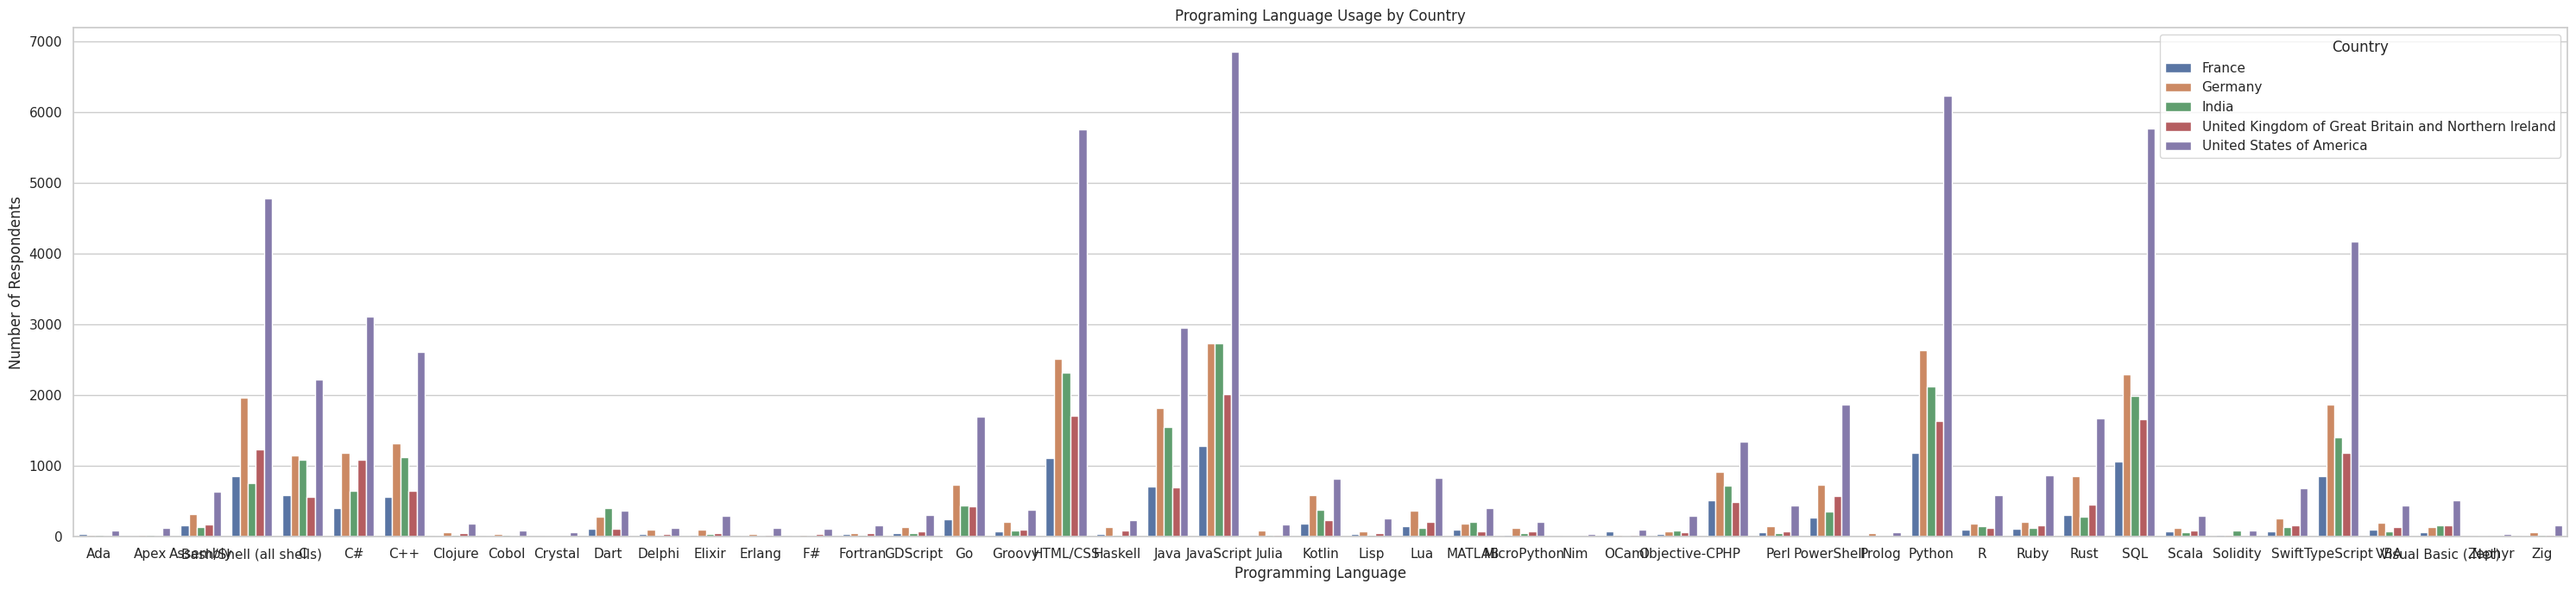

In [9]:
## Write your code here
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'Country'])

df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('LanguageHaveWorkedWith')

lang_counts = df_exploded.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

top_countries = lang_counts.groupby('Country')['Count'].sum().sort_values(ascending=False).head(5).index
filtered = lang_counts[lang_counts['Country'].isin(top_countries)]

plt.figure(figsize=(30, 7))
sns.barplot(data=filtered, x='LanguageHaveWorkedWith', y='Count', hue='Country')
plt.title('Programing Language Usage by Country')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


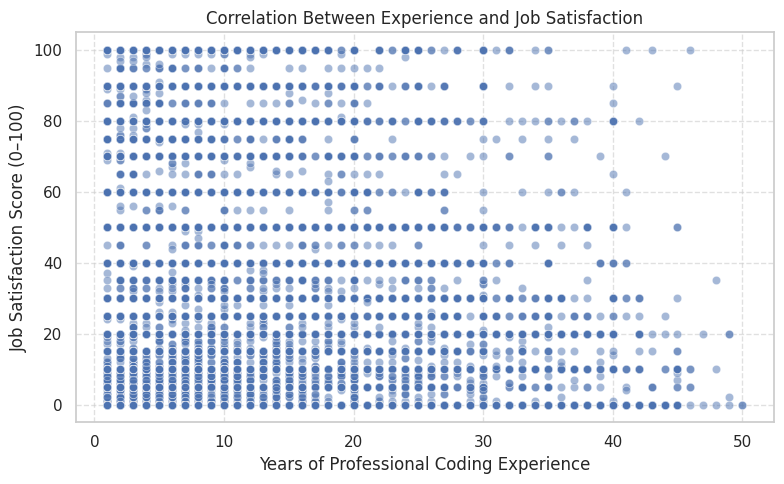

In [10]:
## Write your code here

# Ensure numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop missing values
df_exp_sat = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_exp_sat, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (0–100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [12]:
## Write your code here
# Drop missing values
df_ed_emp = df.dropna(subset=['EdLevel', 'Employment'])

# Cross-tabulation
ed_employment_crosstab = pd.crosstab(df_ed_emp['EdLevel'], df_ed_emp['Employment'])

# Display table
ed_employment_crosstab.head()

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Student, part-time","Employed, full-time;Student, full-time;Student, part-time;Employed, part-time","Employed, full-time;Student, part-time","Employed, full-time;Student, part-time;Employed, part-time","Employed, part-time","Empl

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [13]:
## Write your code here
# Save cleaned dataset to CSV
df.to_csv('cleaned_data.csv', index=False)

# Optional message
print("Dataset saved as 'cleaned_data.csv'")

Dataset saved as 'cleaned_data.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
